In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Input, Rescaling, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import tensorflow as tf

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, make_scorer,
    accuracy_score, roc_auc_score, recall_score, balanced_accuracy_score,
    precision_score, f1_score, RocCurveDisplay)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
path = "/kaggle/input/images-rdts"

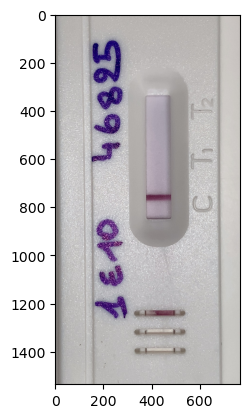

In [4]:
plt.imshow(plt.imread(path + '/NEGATIVE/JPEG image-08B1EEC706E7-10.jpeg'));

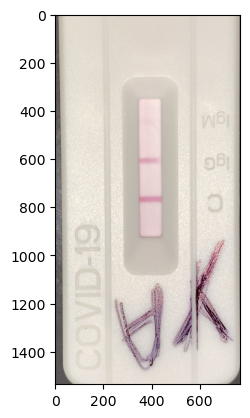

In [5]:
plt.imshow(plt.imread(path + '/POSITIVE/JPEG image-0885EC1F25E4-1.jpeg'));

In [6]:
# Check image size
plt.imread(path + '/NEGATIVE/JPEG image-08B1EEC706E7-10.jpeg').shape

(1536, 768, 3)

In [7]:
def split_data(size):
    train_data = image_dataset_from_directory(
        path,
        image_size = (size, size),
        seed = 42,
        subset = 'training',
        validation_split = 0.2,
        batch_size = 32
    )

    test_data = image_dataset_from_directory(
        path,
        image_size = (size, size),
        seed = 42,
        subset = 'validation',
        validation_split = 0.2,
        batch_size = 32
    )
    return train_data, test_data

In [8]:
train_data, test_data = split_data(224)

Found 2538 files belonging to 2 classes.
Using 2031 files for training.
Found 2538 files belonging to 2 classes.
Using 507 files for validation.


In [9]:
class_names = train_data.class_names
print(class_names)

['NEGATIVE', 'POSITIVE']


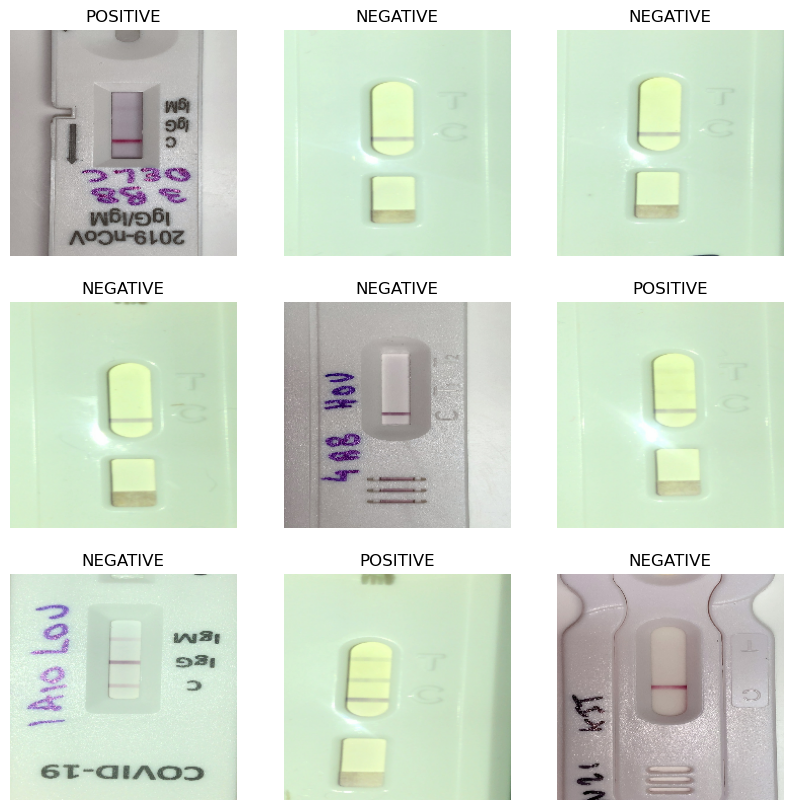

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
model = Sequential()
model.add(Rescaling(1./223, input_shape = (224, 224, 3)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size = (2, 2)))
          
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size = (2, 2)))
          
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(optimizer = 'adam', loss = 'bce', metrics = ['acc'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 dropout_1 (Dropout)         (None, 109, 109, 64)      0         
                                                        

In [14]:
es = EarlyStopping(patience = 5)

In [15]:
history = model.fit(
    train_data,
    validation_data = test_data,
    epochs = 50,
    callbacks = [es]
)

Epoch 1/50


2023-06-23 18:15:28.246070: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


64/64 [==============================] - 32s 338ms/step - loss: 0.9688 - acc: 0.5702 - val_loss: 0.7900 - val_acc: 0.5641
Epoch 2/50
64/64 [==============================] - 17s 246ms/step - loss: 0.6987 - acc: 0.6667 - val_loss: 0.6713 - val_acc: 0.6805
Epoch 3/50
64/64 [==============================] - 17s 241ms/step - loss: 0.5894 - acc: 0.7390 - val_loss: 0.5711 - val_acc: 0.7298
Epoch 4/50
64/64 [==============================] - 17s 245ms/step - loss: 0.4816 - acc: 0.7957 - val_loss: 0.5879 - val_acc: 0.7811
Epoch 5/50
64/64 [==============================] - 16s 232ms/step - loss: 0.4839 - acc: 0.7922 - val_loss: 0.6258 - val_acc: 0.7613
Epoch 6/50
64/64 [==============================] - 17s 244ms/step - loss: 0.4403 - acc: 0.8351 - val_loss: 0.4827 - val_acc: 0.8245
Epoch 7/50
64/64 [==============================] - 16s 231ms/step - loss: 0.3666 - acc: 0.8661 - val_loss: 0.4213 - val_acc: 0.8639
Epoch 8/50
64/64 [==============================] - 17s 245ms/step - loss: 0.333

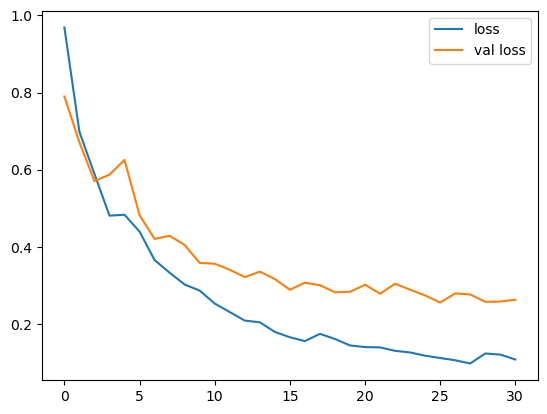

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend();

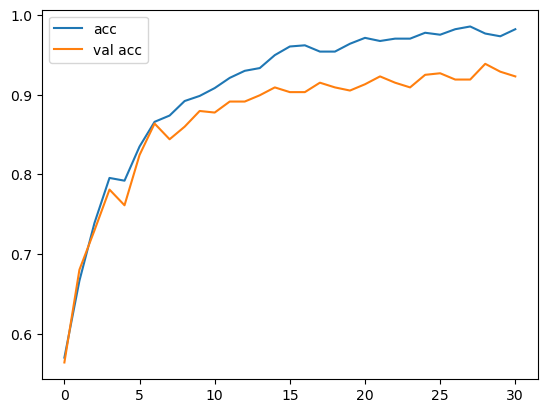

In [17]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend();

In [18]:
predicted_labels = []
true_labels = []
all_images = []

for images, labels in test_data:
    # Make predictions for this batch and apply the threshold
    preds = model.predict(images)
    preds = (preds > 0.5).astype("int32")
    
    # Extend the lists
    predicted_labels.extend(preds)
    true_labels.extend(labels.numpy())
    
    # Get images
    all_images.append(images)

# Convert lists to numpy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

1/1 [==============================] - 0s 123ms/step


In [19]:
confusion_matrix(true_labels, predicted_labels)

array([[275,  11],
       [ 28, 193]])

In [20]:
accuracy = accuracy_score(true_labels, predicted_labels)

accuracy

0.9230769230769231

In [21]:
model.save('own_cnn.h5')